## Import Important Libraries.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

## Download & Upload Dataset.

In [ ]:
# Load your sales data (replace 'sales_data.csv' with your dataset)
df = pd.read_csv('car_purchasing.csv', encoding='latin1')

In [ ]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


##  Step 2: Data Visualization and Exploration

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

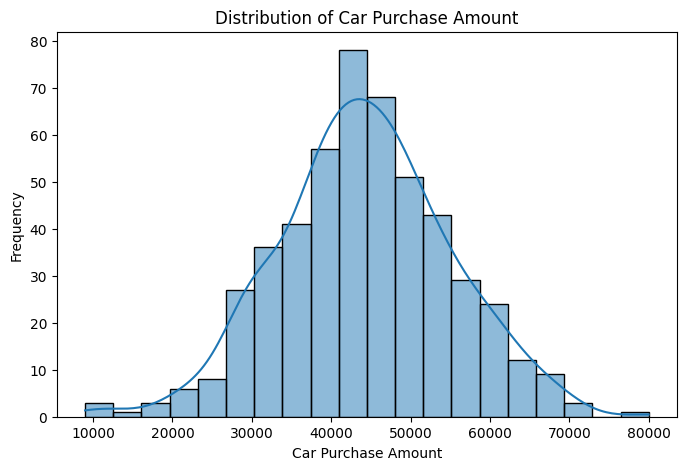

In [ ]:
# Visualize the distribution of the target variable ('car purchase amount')
plt.figure(figsize=(8, 5))
sns.histplot(data['car purchase amount'], bins=20, kde=True)
plt.title('Distribution of Car Purchase Amount')
plt.xlabel('Car Purchase Amount')
plt.ylabel('Frequency')
plt.show()

<ipython-input-16-80a464c374b6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


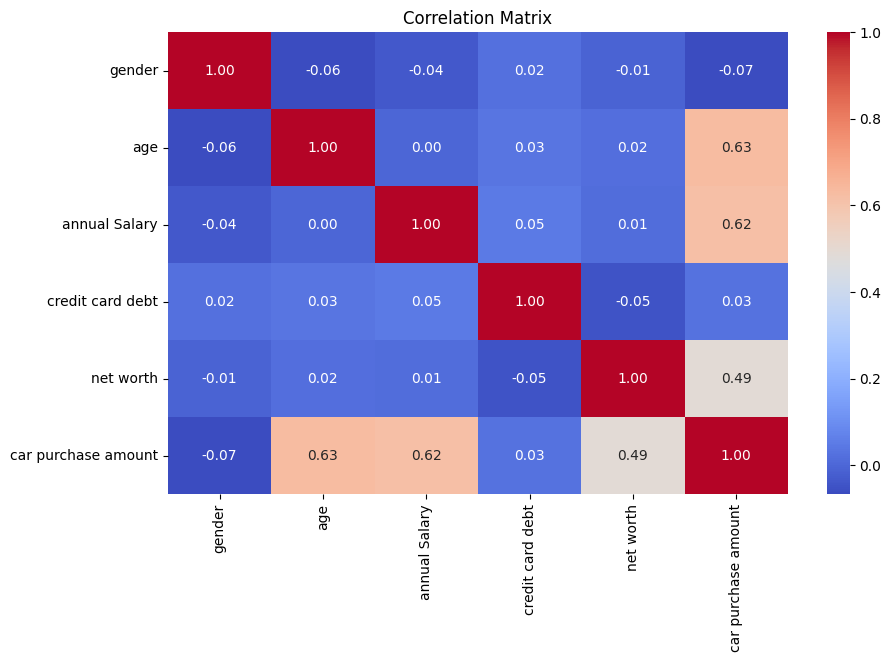

In [ ]:
# Explore correlations between numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Step 3: Data Splitting



In [ ]:
from sklearn.model_selection import train_test_split

X = data[['annual Salary', 'credit card debt', 'net worth']]
y = data['car purchase amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 4: Model Selection and Training

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Step 5: Model Evaluation

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')


Mean Absolute Error: 5283.38
Mean Squared Error: 42350161.96
Root Mean Squared Error: 6507.70
R-squared (R2): 0.61


## Step 6: Prediction and Optimization

In [ ]:
# Example prediction for a new customer
new_customer_features = [65000, 8000, 400000]  # Provide values for 'annual Salary', 'credit card debt', and 'net worth'
predicted_car_purchase = model.predict([new_customer_features])

print(f'Predicted Car Purchase Amount: ${predicted_car_purchase[0]:.2f}')

Predicted Car Purchase Amount: $44514.94


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
